# IMDB Movie Analysis

## Introduction

Movies are interesting topic from a socio-economic perspective. One of the largest areas that require analysis is the mismatch between consumer expectations and studio expectations. This often leads to disappointment at the box-office for blockbuster movies. Below we will answer the following questions:
- Q1: Is a big buget movie indicative of a well-rated movie?
- Q2: Will a big buget movie indicate a profitable movie?
- Q3: Do movies that are better reviewed, ultimately generate more profit?

## Packages

The code below imports the required packages for the analysis.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os

## Gather Data

Data is being pulled from an IMDB movie dataset. This data was collected in 2021 and downloaded and saved for conssumption.

In [8]:
# Using the relative filepath to the install location the data path is setup
data = os.getcwd() + '\\tmdb_5000_movies.csv'
# Pandas reads in the CSV to create the dataset
df = pd.read_csv(data)
# The columns required to answer the questions

## Assess Data

In [9]:
df = df[['budget', 'revenue', 'vote_average']].copy()
# Net Income represents the difference between gross revenue and budget
# Budget is a surrogate for actual cost spent
df['net_income'] = df['revenue'] - df['budget']
df.describe()

,budget,revenue,vote_average,net_income
count,4.803000e+03,4.803000e+03,4803.000000,4.803000e+03
mean,2.904504e+07,8.226064e+07,6.092172,5.321560e+07
std,4.072239e+07,1.628571e+08,1.194612,1.359677e+08
min,0.000000e+00,0.000000e+00,0.000000,-1.657101e+08
25%,7.900000e+05,0.000000e+00,5.600000,-7.995375e+05
50%,1.500000e+07,1.917000e+07,6.200000,2.511317e+06
75%,4.000000e+07,9.291719e+07,6.800000,5.531286e+07
max,3.800000e+08,2.787965e+09,10.000000,2.550965e+09


Note the above data is all numerical data. Zeros being recorded in the budget or revenue column represents incomplete or erroneous data. This is due to the idea that movies require some kind of financial constraint to be produced and must produce some kind of revenue as a return on that investment. We will clean this up in the following step.

## Clean Data

Data cleaned to remove anomaly data where the budget or the revenue are 0, indicating errors in the data or extreme outliers.

In [6]:
# Remove movies with no budget or revenue
df_clean = df[(df['budget'] > 0) &
              (df['revenue'] > 0)
             ]

## Analyze Data

### Q1: Is a big buget movie indicative of a well-rated movie?

To determine if a big budget movie is the key to a well-rated movie, we will compare the voter average score against the budget the movie was given.

In [10]:
# Create budget v. voter average specific data set
df_bug_va = df_clean[['budget', 'vote_average']].copy()
df_bug_va.head(2)

,budget,vote_average
0,237000000,7.2
1,300000000,6.9


In [11]:
# Use correlation to determine the relationship between the variables
df_bug_va.corr()

,budget,vote_average
budget,1.000000,-0.031208
vote_average,-0.031208,1.000000


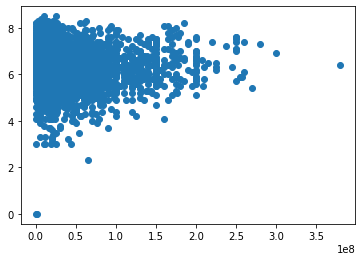

In [12]:
# Use a scatter plot visualize the variables relationship
plt.scatter(df_bug_va['budget'], df_bug_va['vote_average'])
plt.show()

When assessing budget against the voter average we note that the correlation value is near zero and that the scatter plot is not indicative of any relationship, positive or negative.

### Q2: Will a big buget movie indicate a profitable movie?

To determine if a big budget movie is the key to a profitable movie, we will compare the movie's net income score against the budget the movie was given.

In [13]:
# Subset the data to compate budget against net income
df_bug_ni = df_clean[['budget', 'net_income']].copy()
df_bug_ni.head(2)

,budget,net_income
0,237000000,2550965087
1,300000000,661000000


In [14]:
# Use correlation to determine the relationship between the variables
df_bug_ni.corr()

,budget,net_income
budget,1.000000,0.550252
net_income,0.550252,1.000000


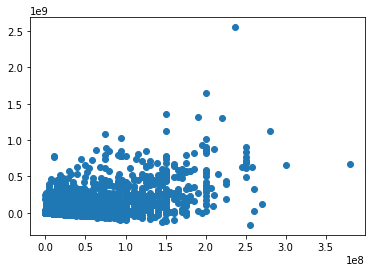

In [15]:
# Use a scatter plot visualize the variables relationship
plt.scatter(df_bug_ni['budget'], df_bug_ni['net_income'])
plt.show()

There is some evidence to support that there is a correlation between a movie's budget and a movie's profit. The scatter plot also indicates there is some positive relationship between the two.

### Q3: Do movies that are better reviewed, ultimately generate more profit?

In [16]:
# Create net income v. voter average specific data set
df_va_ni = df_clean[['vote_average', 'net_income']].copy()
df_va_ni.head(2)

,vote_average,net_income
0,7.2,2550965087
1,6.9,661000000


In [17]:
# Use correlation to determine the relationship between the variables
df_va_ni.corr()

,vote_average,net_income
vote_average,1.000000,0.230041
net_income,0.230041,1.000000


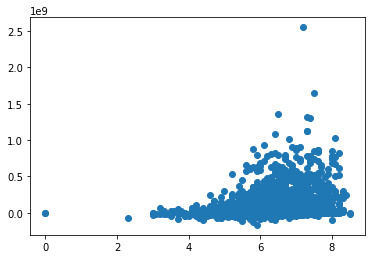

In [18]:
# Use a scatter plot visualize the variables relationship
plt.scatter(df_va_ni['vote_average'], df_va_ni['net_income'])
plt.show()

When assessing profit against the voter average we note that there is a limited correlation between the two variables. This indicates there is some incentive to increase quality for profits, but the primary driver appears to be the budget. The scatter plot indicates a slight relationship, although it is limited.

## Results

- Q1: There is no evidence that big budget movies drive higher voter ratings.
- Q2: There is some evidence that bigger budget movies drive higher profits.
- Q3: There is limited evidence that movies that are better rated, drive higher profits.

## Conclusion

There is some evidence to support that movies that have larger budgets tend to produce higher profits. This is likely the result of larger marketing budgets allowing more visability for the movie during the production process, driving more consumers to the theaters upon release.

However, there is no clear indicatgion that making higher quality movies will turn out additional profits. Thus, it may be more profitable to invest in film visability over film quality.